In [1]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## less Important
from functools import partial
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score

## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras
import tensorflow_datasets as tfds

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

## Data API in TensorFlow
`Understanding Data API`

In [3]:
## create a Dataset from a collection
X_new = tf.range(10)
dummy_1 = tf.data.Dataset.from_tensor_slices(X_new)  ## only returns transformation

## in order to see these values you should iterate over them (Action), or casting them to list
for value in dummy_1:
    print(value)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
## you can repeat then batch for specific number

## will repeat 3 times, then take each 7 as a batch
## you can drop_remainder=True  ==> to delete uncompleted batches
dummy_2 = dummy_1.repeat(3).batch(7)
for value in dummy_2:
    print(value)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [68]:
## you can repeat then batch for specific number

## will repeat 3 times, then take each 7 as a batch
## you can drop_remainder=True  ==> to delete uncompleted batches
## you can also shuffle
dummy_3 = dummy_1.shuffle(buffer_size=100, seed=123).repeat(3).batch(7, drop_remainder=True)
for value in dummy_3:
    print(value)

print()

## other Method
outs_3 = tf.squeeze(list(dummy_3)).numpy()
outs_3  
## without looping, diffrent outs because of shuffle,
## to make this not happende set ==>  , reshuffle_each_iteration=False

tf.Tensor([6 5 8 3 0 7 9], shape=(7,), dtype=int32)
tf.Tensor([4 2 1 5 1 9 6], shape=(7,), dtype=int32)
tf.Tensor([3 8 0 4 7 2 2], shape=(7,), dtype=int32)
tf.Tensor([5 8 7 3 9 6 1], shape=(7,), dtype=int32)



array([[2, 3, 4, 7, 0, 6, 8],
       [5, 1, 9, 7, 2, 8, 1],
       [5, 3, 9, 0, 6, 4, 0],
       [7, 4, 3, 9, 5, 1, 6]])

In [6]:
## you can map, filter, reduce or many other transformations
dummy_4 = dummy_2.map(lambda x: x*2)
for value in dummy_4:
    print(value)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [7]:
## you can unbatch these batches
dummy_5 = dummy_2.apply(tf.data.experimental.unbatch())
for value in dummy_5:
    print(value)

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.T

In [8]:
## you can make filter
dummy_6 = dummy_1.filter(lambda x: x>5)
outs_6 = tf.squeeze(list(dummy_6)).numpy()
outs_6  ## final output without looping

array([6, 7, 8, 9])

## Using California Housing Dataset 
#### `understanding Interleave, shuffle, ... and other`

In [9]:
## load housing dataset
housing_dataset = datasets.fetch_california_housing()

df_housing = pd.DataFrame(np.c_[housing_dataset['data'], housing_dataset['target']], 
                         columns=housing_dataset['feature_names']+['target'])

X = df_housing.iloc[:, :-1]
y = df_housing.iloc[:, -1]

In [10]:
## split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=0.20, 
                                                              random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2,
                                                             random_state=42)

## to get only the mean and std of X_train for each feature
X_train_mean = list(X_train.mean())
X_train_std = list(X_train.std())

## or from fitting without transformation by standardscaler
scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_    ## => equal to == X_train_mean
X_std = scaler.scale_     ## equal to == X_train_std

### Split the Dataset into multiple csv Files

In [11]:
## craete a function to split data for each set to multiple csv files
def split_to_mulitple_csv(dataset, dataset_name='train', split_parts=10):
    ''' this function tries to split the dataset with split_parts required to multiple csv files
    Args:
    ****
    (dataset : 2d array) ==> required dataset to be split
    (dataset_name : string) ==> name to be used in creating directory
    (split_parts : int) ==> required number of splits
    '''
    housing_dir_path = os.path.join('dataset_for_split', 'split_housing')
    if not os.path.isdir(housing_dir_path):
        os.makedirs(housing_dir_path)
    each_dir_path = os.path.join(housing_dir_path, dataset_name)
    if not os.path.isdir(each_dir_path):
        os.makedirs(each_dir_path)
        
    file_paths = []
    
    split_data = np.array_split(dataset, split_parts)
    
    for chunk in range(len(split_data)):
        path_each = os.path.join(each_dir_path, f'{dataset_name}_{chunk}.csv')
        file_paths.append(path_each)   ## append to filepaths
        split_data[chunk].to_csv(path_each, index=False)  ## save to csv
        
    return file_paths

In [12]:
## before calling the function ==> make features and target in the same dataframe
col_names = housing_dataset['feature_names'] + ['target']
train_data = pd.DataFrame(np.c_[X_train, y_train], columns=col_names).reset_index(drop=True)
valid_data = pd.DataFrame(np.c_[X_valid, y_valid], columns=col_names).reset_index(drop=True)
test_data = pd.DataFrame(np.c_[X_test, y_test], columns=col_names).reset_index(drop=True)

## call the function for splitting ==> train, valid, test
train_filePaths = split_to_mulitple_csv(train_data, dataset_name='train', split_parts=20)
valid_filePaths = split_to_mulitple_csv(valid_data, dataset_name='valid', split_parts=10)
test_filePaths = split_to_mulitple_csv(test_data, dataset_name='test', split_parts=10)

In [13]:
train_filePaths

['dataset_for_split\\split_housing\\train\\train_0.csv',
 'dataset_for_split\\split_housing\\train\\train_1.csv',
 'dataset_for_split\\split_housing\\train\\train_2.csv',
 'dataset_for_split\\split_housing\\train\\train_3.csv',
 'dataset_for_split\\split_housing\\train\\train_4.csv',
 'dataset_for_split\\split_housing\\train\\train_5.csv',
 'dataset_for_split\\split_housing\\train\\train_6.csv',
 'dataset_for_split\\split_housing\\train\\train_7.csv',
 'dataset_for_split\\split_housing\\train\\train_8.csv',
 'dataset_for_split\\split_housing\\train\\train_9.csv',
 'dataset_for_split\\split_housing\\train\\train_10.csv',
 'dataset_for_split\\split_housing\\train\\train_11.csv',
 'dataset_for_split\\split_housing\\train\\train_12.csv',
 'dataset_for_split\\split_housing\\train\\train_13.csv',
 'dataset_for_split\\split_housing\\train\\train_14.csv',
 'dataset_for_split\\split_housing\\train\\train_15.csv',
 'dataset_for_split\\split_housing\\train\\train_16.csv',
 'dataset_for_split\\spl

In [70]:
pd.read_csv(train_filePaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.5156,18.0,6.139303,1.323383,543.0,2.701493,39.79,-120.53,0.719
1,3.2604,30.0,5.551020,1.081633,531.0,3.612245,37.61,-120.76,0.879
2,5.6094,24.0,6.290141,0.977465,1162.0,3.273239,33.85,-118.04,2.792
3,1.2413,11.0,3.967700,1.177003,2812.0,3.633075,32.69,-117.10,0.831
4,5.3506,33.0,5.322957,0.974060,1837.0,2.382620,37.52,-122.29,3.881


### Building an Input Pipeline
#### `interleave  between train_files`

In [15]:
train_dataset_filePaths = tf.data.Dataset.list_files(train_filePaths, shuffle=True, seed=42)
[*train_dataset_filePaths]  ## shuffle these 20 csv files

[<tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_5.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_16.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_11.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_1.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_18.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_13.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_9.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_6.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\train_10.csv'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dataset_for_split\\split_housing\\train\\

In [16]:
## you can call interleave method to read from five files at a time and interleave their lines
## skipping the first line as it is a header
## cycle_length to select the number to read from files at a time
## num_parallel_calls=True ==> to use parallelism instead of sequential (to read files in parallel)

n_readers = 10  ## interleave will take 10 files at time
train_dataset = train_dataset_filePaths.interleave(
                            lambda filepath: tf.data.TextLineDataset(filepath).skip(1), 
                            cycle_length=n_readers, num_parallel_calls=n_readers)

for line in train_dataset.take(5):
    print(line.numpy())   ## need to parsed as it is byte string

b'3.8029,35.0,5.641379310344828,1.0528735632183908,1110.0,2.5517241379310347,34.11,-118.02,4.148'
b'2.1793,39.0,3.932098765432099,0.9845679012345679,1362.0,4.203703703703703,33.99,-118.25,1.079'
b'4.875,40.0,5.181818181818182,1.0101010101010102,399.0,4.03030303030303,33.91,-118.1,1.676'
b'1.9014,24.0,5.024326672458732,1.0912250217202433,1990.0,1.7289313640312771,33.7,-117.19,0.835'
b'0.9318,35.0,2.803339517625232,1.1001855287569573,914.0,1.6957328385899815,33.78,-118.19,1.875'


In [17]:
## check shape of train_dataset

# old is
print('old shape =>', train_data.shape)

# new is
print('new shape is =>', len(tf.squeeze(list(train_dataset))))  ## the same ok

old shape => (3302, 9)
new shape is => 3302


#### `Preprocessing the data to solve byte string problem`

In [18]:
def preprocess(line):
    ''' this function tries to preprocess and parse the output from byte string to flaot
    '''
    n_inputs = len(X_mean)  ## 8 fetures
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]  ## defalut datatypes
    fields = tf.io.decode_csv(line, record_defaults=defs) ## Convert CSV records to tensors 

    features = tf.stack(fields[:-1])
    label = tf.stack(fields[-1:])
    
    ## Normalize the data
    features_norm = (features - X_train_mean) / X_train_std
    
    return features_norm, label

In [19]:
line_test = b'3.8029,35.0,5.641379310344828,1.0528735632183908,1110.0,2.5517241379310347,34.11,-118.02,4.148'
preprocess(line_test)    ## seems good => that what i need

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([-0.03542254,  0.51437455,  0.0494825 , -0.090136  , -0.26611662,
        -0.05940131, -0.7260594 ,  0.78286725], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.148], dtype=float32)>)

#### `Putting everything together`

1. read from list files
2. interleave between these list files
3. preprocess the output with the previous function
4. shuffle, repeat, batch, and prefetch data

In [71]:
def putting_all_step_together(file_paths, n_readers=5, n_shuffle=5000, n_batch_size=32):
    ''' this function tries to put all steps of preprocessing the data which splitted
        to multiple csv files specially for big dataset which does not fit in memory
        reading from list files and interleave between them, preprocess the output as the 
        ouput is formatted as byte string, then shuffle, repeat, batch and prefetch
    Args:
    *****
        (filepath: string) ==> list of files containing the file paths of required dataset
        (n_readers : int) ==> number of files, tensorflow interleave them at a time
        (n_shuffle : int) ==> buffer size of shuffle
        (n_batch_size : int) ==> number of batch_size
    Returns:
    ********
        the final dataset
    '''
    data_filePaths = tf.data.Dataset.list_files(file_paths)  # reading from list files
    dataset = data_filePaths.interleave(     ## interleave, skip the header, using n_readers
                lambda filepath: tf.data.TextLineDataset(filepath).skip(1), 
                cycle_length=n_readers, num_parallel_calls=n_readers) 
    
    dataset = dataset.map(preprocess, num_parallel_calls=n_readers)  ## mapping to the above function
    dataset = dataset.shuffle(buffer_size=n_shuffle, seed=123).repeat(1)
    dataset = dataset.batch(n_batch_size).prefetch(1)
    return dataset

In [21]:
## final preprocessing on dataset
train_data_final = putting_all_step_together(train_filePaths)
valid_data_final = putting_all_step_together(valid_filePaths)
test_data_final = putting_all_step_together(test_filePaths)

In [22]:
for value in train_data_final.take(1):
    print(value)  ## first batch with 32 array each of 8 values for features, then 32 for target

(<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[ 7.71730185e-01,  8.31815004e-01,  5.37235618e-01,
        -5.16370423e-02, -4.56512392e-01, -6.21708259e-02,
         1.05110610e+00, -1.35011792e+00],
       [ 2.12278366e+00, -1.94578886e+00, -1.11743204e-01,
        -1.80651590e-01, -7.45305955e-01, -5.60712181e-02,
        -9.35411751e-01,  8.77332509e-01],
       [ 1.17703581e+00,  4.35014457e-01,  1.19843662e-01,
        -3.66109997e-01, -4.84511763e-01,  4.77443114e-02,
        -8.51670802e-01,  8.52474809e-01],
       [ 5.62710941e-01, -9.93467510e-01,  1.71364024e-02,
        -3.88409317e-01, -6.52508020e-01, -3.07168253e-03,
        -7.26059377e-01,  1.09610140e+00],
       [ 2.48003170e-01, -7.55387187e-01, -8.90222937e-02,
        -8.50467235e-02, -9.33204815e-02, -8.66049826e-02,
        -7.30712652e-01,  9.56886232e-01],
       [-4.36117113e-01, -4.37946737e-01, -4.38922763e-01,
        -6.58479556e-02,  2.11623025e+00, -4.38315533e-02,
        -8.98192763e-01,  8

##### `Building the Model`

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

n_epochs = 20
n_batch_size = 32
s = n_epochs * len(X_train) // n_batch_size
lr_exponen = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, 
                                                            decay_steps=s,
                                                            decay_rate=0.1)
my_optimiz = tf.keras.optimizers.RMSprop(learning_rate=lr_exponen)
model.compile(loss='mse', optimizer=my_optimiz, metrics=['mae'])

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


history = model.fit(train_data_final, validation_data=valid_data_final, 
                    epochs=n_epochs, batch_size=n_batch_size, callbacks=[early_stopp])

Epoch 1/20
104/104 [==============================] - 2s 8ms/step - loss: 1.0124 - mae: 0.6530 - val_loss: 0.6837 - val_mae: 0.5824
Epoch 2/20
104/104 [==============================] - 1s 7ms/step - loss: 0.5829 - mae: 0.5027 - val_loss: 0.4773 - val_mae: 0.4928
Epoch 3/20
104/104 [==============================] - 1s 7ms/step - loss: 0.4862 - mae: 0.4767 - val_loss: 0.4612 - val_mae: 0.4914
Epoch 4/20
104/104 [==============================] - 1s 6ms/step - loss: 0.4607 - mae: 0.4707 - val_loss: 0.4525 - val_mae: 0.4874
Epoch 5/20
104/104 [==============================] - 1s 7ms/step - loss: 0.4336 - mae: 0.4638 - val_loss: 0.4528 - val_mae: 0.4893
Epoch 6/20
104/104 [==============================] - 1s 7ms/step - loss: 0.4193 - mae: 0.4582 - val_loss: 0.5041 - val_mae: 0.4915
Epoch 7/20
104/104 [==============================] - 1s 6ms/step - loss: 0.4096 - mae: 0.4550 - val_loss: 0.4751 - val_mae: 0.4769
Epoch 8/20
104/104 [==============================] - 1s 7ms/step - loss: 0.

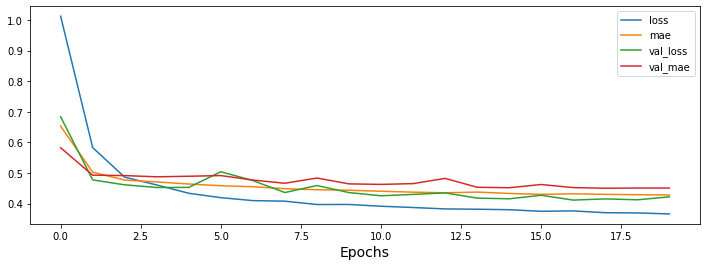

In [28]:
pd.DataFrame(history.history).plot(figsize=(12, 4))
plt.xlabel('Epochs', fontsize=14);

In [31]:
## evaluate this model
mse_test, mae_test = model.evaluate(test_data_final, verbose=0)
print('mse_test =>', mse_test)
print('mae_test =>', mae_test)

mse_test => 0.36749348044395447
mae_test => 0.422836035490036


In [43]:
## evaluate on new dataset
X_new = test_data_final.take(3).map(lambda x, y: x) ## take only the features
y_preds = model.predict(X_new)
y_preds

array([[3.3677921 ],
       [1.3310635 ],
       [1.872678  ],
       [1.5208141 ],
       [3.2843537 ],
       [0.6505389 ],
       [2.6353254 ],
       [1.1508127 ],
       [3.3986974 ],
       [1.2798111 ],
       [1.6578592 ],
       [0.8442855 ],
       [0.64515764],
       [1.0092124 ],
       [5.0035925 ],
       [1.2079382 ],
       [1.068916  ],
       [0.872061  ],
       [1.4522307 ],
       [2.192949  ],
       [1.3390065 ],
       [2.6621919 ],
       [1.9383812 ],
       [2.7691536 ],
       [0.82575536],
       [3.3791819 ],
       [2.440524  ],
       [0.6170407 ],
       [2.4356966 ],
       [2.9775233 ],
       [2.374599  ],
       [1.5264574 ],
       [0.6342253 ],
       [3.0059605 ],
       [2.8295536 ],
       [3.5785856 ],
       [2.0153074 ],
       [0.85962033],
       [2.0320902 ],
       [1.471571  ],
       [1.0308676 ],
       [1.4101477 ],
       [2.8237057 ],
       [1.8492774 ],
       [1.0060358 ],
       [0.83715826],
       [1.7229215 ],
       [1.915

In [50]:
X_new, y_new = list(test_data_final)[50]
X_new.shape, y_new.shape   ## test again

(TensorShape([32, 8]), TensorShape([32, 1]))

In [59]:
y_pred_vals = model.predict(X_new)
mse_batch50 = tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_new, y_pred_vals)).numpy()
print('mse_batch50 =>', mse_batch50)
mae_batch50 = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_new, y_pred_vals)).numpy()
print('mae_batch50 =>', mae_batch50)

mse_batch50 => 0.2357958
mae_batch50 => 0.373627
